# Loanword analysis using Markov language model  
### with Kneser Ney smoothing 
### Files from WOLD  - forms, segmented forms, indicator of loan words  
## Requires NLTK3.5  

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Do this once in the kernel.
import sys
sys.path.append('code')

# Set to automatically reload.
%load_ext autoreload
%autoreload 2

In [ ]:
# List of study languages:
languages = ['English', 'Hup', 'ImbaburaQuechua', 'Mapudungun', 'Qeqchi', 'Wichi']
# English for development and the Latin American languages for strong regioinal interest.

In [2]:
# Compile code for MarkovCharLM...
import py_compile
py_compile.compile('code/utility_functions.py')
py_compile.compile('code/markov_char_lm.py')
py_compile.compile('code/markov_model_analysis.py')

'code/__pycache__/markov_model_analysis.cpython-38.pyc'

In [3]:
from utility_functions import *
from markov_char_lm import MarkovCharLM
from markov_model_analysis import analyze_language_word_distributions
from markov_model_analysis import analyze_language_word_distributions_native_basis
from markov_model_analysis import language_word_discrimination_dual_basis
from markov_model_analysis import language_word_discrimination_native_basis
from markov_model_analysis import language_word_discrimination_dual_basis
from markov_model_analysis import language_word_discrimination_native_basis
from markov_model_analysis import k_fold_language_word_discrimination_native_basis
from markov_model_analysis import k_fold_language_word_discrimination_dual_basis
from markov_model_analysis import k_fold_entropy_for_language

# Randomization test for distribution differences  
## Markov model entropies calculated from undifferentiated (entire) word table  
1. Fit Markov model to undifferentiated sample or entire table.  
2. Examine distributiona of native and loan words.  
3. Randomization test for native versus loan word distributional differences.
    1. Calculate decision statistic for 'true' vector of native versus loan.  
    2. Perform n randomizations of vector which arbitrarily designates native versus loan.
        1. calculate statistic for each randomization.
    3. Determine empirical probability distribution of statistic and probability of original decision statistic.  
        

Language=English


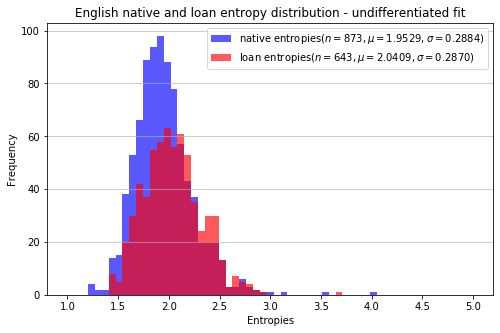

prob (ks stat >= 0.16808) = 0.00495


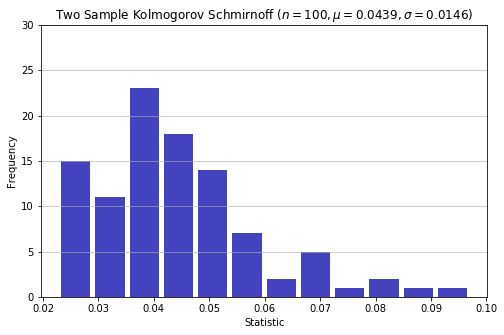

Language=English


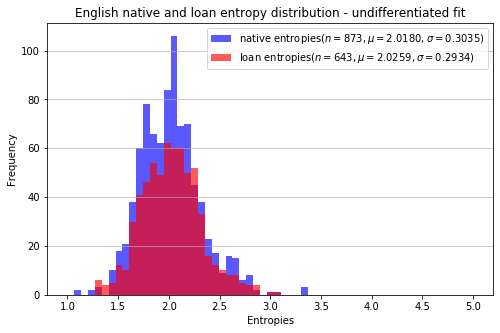

prob (ks stat >= 0.04214) = 0.49010


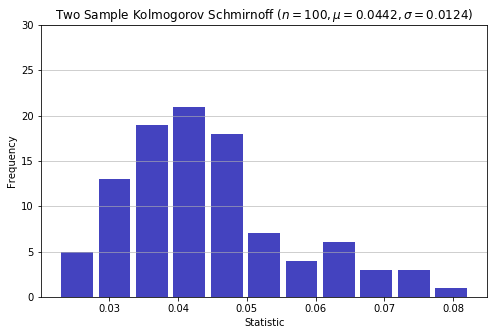

In [4]:
# Test
analyze_language_word_distributions('English', form='formchars', test='ks', n=100)
analyze_language_word_distributions('English', form='segments', test='ks', n=100)

# Testing on both original forms, segmented by character, and curated segmentation with IPA symbols.
# Only used 100 replicates in randomization for testing. Practical would be 5000.

# Randomization tests for distribution differences  
## Constructs native and loan Markov models for each randomization  
- Repeated estimation of model and with random selector - very compute intensive
    - Correct approach in that it incoporates the learning bias.
    - Reduced repetitions to 1000 due to compute time.  

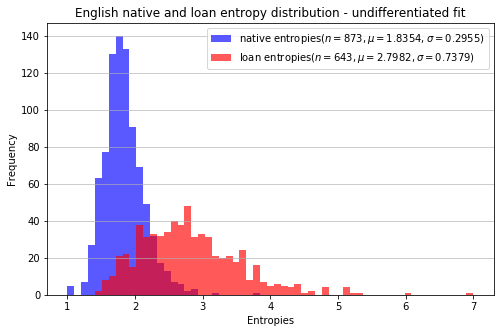

prob (stat >= 0.6870465084378602 ) = 0.004950495049504955


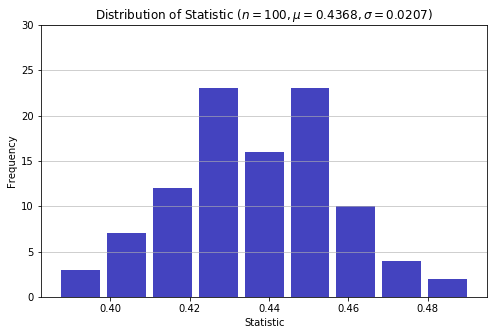

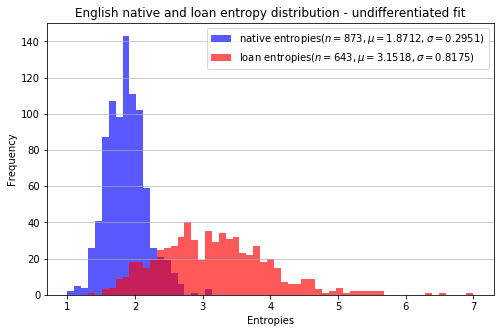

prob (stat >= 0.7809184824143699 ) = 0.004950495049504955


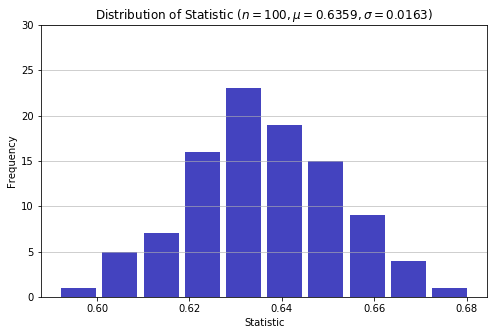

In [5]:
#Test
analyze_language_word_distributions_native_basis('English', test='ks', n=100)
analyze_language_word_distributions_native_basis('English', form='segments', test='ks', n=100)

# Testing on both original forms, segmented by character, and curated segmentation with IPA symbols.
# Only used 100 replicates in randomization for testing. Practical would be 1000, and still costly in time.

# Word discrimination - based on native versus loan entropy models

In [12]:
#Test
language_word_discrimination_dual_basis("English", smoothing=0.5)
language_word_discrimination_dual_basis("English", form='segments', smoothing=0.5)


English
num train= 1213, num test=  303

* TRAIN RESULTS *
precision, recall, F1 = (0.9486803519061584, 0.940406976744186, 0.9445255474452555)
n = 1213  accuracy = 0.9373454245671888
confusion matrix: tn, fp, fn, tp [490  35  41 647]
Predict majority: accuracy= 0.5671887881286067

* TEST RESULTS *
precision, recall, F1 = (0.813953488372093, 0.7567567567567568, 0.7843137254901962)
n = 303  accuracy = 0.7458745874587459
confusion matrix: tn, fp, fn, tp [ 86  32  45 140]
Predict majority: accuracy= 0.6105610561056105

English
num train= 1213, num test=  303

* TRAIN RESULTS *
precision, recall, F1 = (0.9774964838255977, 0.9747545582047685, 0.9761235955056179)
n = 1213  accuracy = 0.9719703215169002
confusion matrix: tn, fp, fn, tp [484  16  18 695]
Predict majority: accuracy= 0.5877988458367683

* TEST RESULTS *
precision, recall, F1 = (0.688622754491018, 0.71875, 0.7033639143730887)
n = 303  accuracy = 0.6798679867986799
confusion matrix: tn, fp, fn, tp [ 91  52  45 115]
Predict majorit

# Word discrimination - based on just native known  
- smoothing=0.5  
- z=0.995  

In [7]:
#Test
language_word_discrimination_native_basis('English', smoothing=0.5, p=.995)
language_word_discrimination_native_basis('English', form='segments', smoothing=0.5, p=.995)


English
num train= 1213, num test=  303
Native avg=2.611, stdev=0.430
fraction 0.995, idx 693.51, ref limit=4.048

* TRAIN RESULTS *
precision, recall, F1 = (0.717683557394002, 0.994269340974212, 0.8336336336336335)
n = 1213  accuracy = 0.7716405605935697
confusion matrix: tn, fp, fn, tp [242 273   4 694]
Predict majority: accuracy= 0.5754328112118714

* TEST RESULTS *
precision, recall, F1 = (0.6818181818181818, 0.8571428571428571, 0.759493670886076)
n = 303  accuracy = 0.6864686468646864
confusion matrix: tn, fp, fn, tp [ 58  70  25 150]
Predict majority: accuracy= 0.5775577557755776

English
num train= 1213, num test=  303
Native avg=2.644, stdev=0.420
fraction 0.995, idx 681.58, ref limit=3.722

* TRAIN RESULTS *
precision, recall, F1 = (0.8525, 0.9941690962099126, 0.9179004037685061)
n = 1213  accuracy = 0.8994229183841714
confusion matrix: tn, fp, fn, tp [409 118   4 682]
Predict majority: accuracy= 0.5655399835119538

* TEST RESULTS *
precision, recall, F1 = (0.7540983606557377

In [13]:
# Test k-fold native basis word discrimination. 
# No interest in return table of k-fold trials.
_ = k_fold_language_word_discrimination_native_basis('English', form='formchars', smoothing=0.5, k_fold=10, p=.995)
_ = k_fold_language_word_discrimination_native_basis('English', form='segments', smoothing=0.5, k_fold=10, p=.995)



English
Native avg=2.627, stdev=0.418
fraction 0.995, idx 775.11, ref limit=4.074

* TRAIN RESULTS *
precision, recall, F1 = (0.7119266055045872, 0.9948717948717949, 0.8299465240641711)
n = 1364  accuracy = 0.7668621700879765
confusion matrix: tn, fp, fn, tp [270 314   4 776]
Predict majority: accuracy= 0.5718475073313783

* TEST RESULTS *
precision, recall, F1 = (0.7053571428571429, 0.8494623655913979, 0.7707317073170732)
n = 152  accuracy = 0.6907894736842105
confusion matrix: tn, fp, fn, tp [26 33 14 79]
Predict majority: accuracy= 0.6118421052631579
Native avg=2.630, stdev=0.416
fraction 0.995, idx 780.08, ref limit=4.028

* TRAIN RESULTS *
precision, recall, F1 = (0.7191528545119705, 0.9949044585987261, 0.8348476750400855)
n = 1364  accuracy = 0.7734604105571847
confusion matrix: tn, fp, fn, tp [274 305   4 781]
Predict majority: accuracy= 0.5755131964809385

* TEST RESULTS *
precision, recall, F1 = (0.6636363636363637, 0.8295454545454546, 0.7373737373737375)
n = 152  accuracy = 

Native avg=2.669, stdev=0.420
fraction 0.995, idx 786.05, ref limit=3.988

* TRAIN RESULTS *
precision, recall, F1 = (0.8030612244897959, 0.9949431099873578, 0.8887634105025409)
n = 1364  accuracy = 0.8555718475073314
confusion matrix: tn, fp, fn, tp [380 193   4 787]
Predict majority: accuracy= 0.5799120234604106

* TEST RESULTS *
precision, recall, F1 = (0.676056338028169, 0.5853658536585366, 0.6274509803921567)
n = 152  accuracy = 0.625
confusion matrix: tn, fp, fn, tp [47 23 34 48]
Predict majority: accuracy= 0.5394736842105263
Native avg=2.678, stdev=0.428
fraction 0.995, idx 782.07, ref limit=4.062

* TRAIN RESULTS *
precision, recall, F1 = (0.7901109989909183, 0.9949174078780177, 0.8807649043869518)
n = 1365  accuracy = 0.8446886446886447
confusion matrix: tn, fp, fn, tp [370 208   4 783]
Predict majority: accuracy= 0.5765567765567765

* TEST RESULTS *
precision, recall, F1 = (0.7160493827160493, 0.6744186046511628, 0.6946107784431137)
n = 151  accuracy = 0.6622516556291391
conf

# Word discrimination with native and loan known  
- smoothing=0.5  
- z=0.995  
## k-fold fit on known native and loan and validation on unknown  

In [14]:
# Test k_fold dual basis word discrimination.
_ = k_fold_language_word_discrimination_dual_basis('English', form='formchars', smoothing=0.5, k_fold=10)
_ = k_fold_language_word_discrimination_dual_basis('English', form='segments', smoothing=0.5, k_fold=10)



English

* TRAIN RESULTS *
precision, recall, F1 = (0.9466327827191868, 0.9454314720812182, 0.946031746031746)
n = 1364  accuracy = 0.9376832844574781
confusion matrix: tn, fp, fn, tp [534  42  43 745]
Predict majority: accuracy= 0.5777126099706745

* TEST RESULTS *
precision, recall, F1 = (0.6666666666666666, 0.6823529411764706, 0.6744186046511628)
n = 152  accuracy = 0.631578947368421
confusion matrix: tn, fp, fn, tp [38 29 27 58]
Predict majority: accuracy= 0.5592105263157895

* TRAIN RESULTS *
precision, recall, F1 = (0.9403553299492385, 0.9415501905972046, 0.940952380952381)
n = 1364  accuracy = 0.9318181818181818
confusion matrix: tn, fp, fn, tp [530  47  46 741]
Predict majority: accuracy= 0.5769794721407625

* TEST RESULTS *
precision, recall, F1 = (0.7311827956989247, 0.7906976744186046, 0.7597765363128492)
n = 152  accuracy = 0.7171052631578947
confusion matrix: tn, fp, fn, tp [41 25 18 68]
Predict majority: accuracy= 0.5657894736842105

* TRAIN RESULTS *
precision, recall, 


* TRAIN RESULTS *
precision, recall, F1 = (0.9732824427480916, 0.9745222929936306, 0.9739019732654359)
n = 1365  accuracy = 0.96996336996337
confusion matrix: tn, fp, fn, tp [559  21  20 765]
Predict majority: accuracy= 0.575091575091575

* TEST RESULTS *
precision, recall, F1 = (0.7619047619047619, 0.7272727272727273, 0.7441860465116279)
n = 151  accuracy = 0.7086092715231788
confusion matrix: tn, fp, fn, tp [43 20 24 64]
Predict majority: accuracy= 0.5827814569536424

* TRAIN RESULTS *
precision, recall, F1 = (0.9746514575411914, 0.9746514575411914, 0.9746514575411914)
n = 1365  accuracy = 0.9706959706959707
confusion matrix: tn, fp, fn, tp [556  20  20 769]
Predict majority: accuracy= 0.578021978021978

* TEST RESULTS *
precision, recall, F1 = (0.7037037037037037, 0.6785714285714286, 0.6909090909090909)
n = 151  accuracy = 0.6622516556291391
confusion matrix: tn, fp, fn, tp [43 24 27 57]
Predict majority: accuracy= 0.5562913907284768

* TRAIN RESULTS *
precision, recall, F1 = (0.97

# Overfitting of Markov model  
## k-fold report of entropy mean and standard deviation  
- Table as argument -- allows selection of subset of language table  
- k-fold determines fit and validation fractions  
- Option to specify subset selector for validation study
    - Can look at only native words with this option.
- No need for randomization tests of differences  
    - Sufficient evidence in statistical description  

## In all orthographic cases, there is still overfitting even for just native words.  


In [15]:
# Test k_fold train versus val entropy studies.
# Can select subset of table for specialized study - with option to increase k_fold for smaller dataset.
k_fold_entropy_for_language('English', k_fold=5, smoothing=[0.5])
k_fold_entropy_for_language('English', k_fold=10, smoothing=0.5, selector=lambda tbl: tbl.borrowedscore<0.375)


5-fold entropy for English.
Sample=1516, k-fold=5, val=304, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.837       0.411       3.378      0.765
StdDev         0.0028      0.0060      0.0181     0.0464
StdErr        0.00140     0.00299     0.00903    0.02322

10-fold entropy for English.
Subset selected: See sample and val sizes.
Sample=873, k-fold=10, val=88, model=KNI, order=3, smoothing=0.5.
Statistic: Train mean Train stdev    Val mean  Val stdev
Mean            2.631       0.422       3.246      0.819
StdDev         0.0030      0.0047      0.0583     0.0895
StdErr        0.00100     0.00156     0.01944    0.02982
